In [3]:
import pandas as pd


df = pd.read_csv('output/flatline.csv')

In [2]:
df

,from_node_id,from_node_label,from_node_summary,to_node_id,to_node_label,to_node_summary,relacion_especifica,categoria_semantica,sentiment,news_index,id,publish_date,title,body
0,3,Guido Garay,Astrónomo que liderará jornada educativa en Ce...,4,Joaquín Lavín,Alcalde que asistirá a la jornada educativa en...,lidero_jornada_con,Interacción Protocolar,neutral,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid..."
1,3,Guido Garay,Astrónomo que liderará jornada educativa en Ce...,5,Felipe Ward,Ministro que asistirá a la jornada educativa e...,lidero_jornada_con,Interacción Protocolar,neutral,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid..."
2,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,8,Andrés Escala,Astrónomo miembro de la delegación de la Unive...,encabezo_delegacion_con,Coordinación Estratégica,neutral,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid..."
3,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,9,Mónica Rubio,Astrónoma miembro de la delegación de la Unive...,encabezo_delegacion_con,Coordinación Estratégica,neutral,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid..."
4,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,1,José Maza,Astrónomo y académico que busca récord Guinnes...,agradecio_compromiso_de,Apoyo Político,positive,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52209,5,Jorge Ortiz,Analista que comparó y valoró la experiencia d...,1,Guillermo Lasso,Candidato proclamado ganador; celebró ventaja ...,elogio_experiencia_y_trayectoria,Intercambio de Información,positive,9998,38c0f62ba8eade064827542642422ec773b678d887ff8a...,2021-04-12,Guillermo Lasso se proclama como el nuevo pres...,Anunció se dio luego de conocerse cifras preli...
52210,5,Jorge Ortiz,Analista que comparó y valoró la experiencia d...,2,Andrés Arauz,Candidato; inicialmente reclamó victoria y lue...,critico_falta_de_meritos,Conflicto Discursivo,negative,9998,38c0f62ba8eade064827542642422ec773b678d887ff8a...,2021-04-12,Guillermo Lasso se proclama como el nuevo pres...,Anunció se dio luego de conocerse cifras preli...
52211,6,Grace Jaramillo,Analista que instó al nuevo gobierno a despola...,1,Guillermo Lasso,Candidato proclamado ganador; celebró ventaja ...,insto_despolarizar_pais,Coordinación Estratégica,positive,9998,38c0f62ba8eade064827542642422ec773b678d887ff8a...,2021-04-12,Guillermo Lasso se proclama como el nuevo pres...,Anunció se dio luego de conocerse cifras preli...
52212,7,Farith Simon,Profesor-analista que llamó a reconstruir prot...,1,Guillermo Lasso,Candidato proclamado ganador; celebró ventaja ...,insto_reconstruir_espiritu_democratico,Coordinación Estratégica,positive,9998,38c0f62ba8eade064827542642422ec773b678d887ff8a...,2021-04-12,Guillermo Lasso se proclama como el nuevo pres...,Anunció se dio luego de conocerse cifras preli...


publish_month
2019-07    2525
2019-08    2221
2019-09    2494
2019-10    2292
2019-11    2014
Freq: M, Name: interacciones, dtype: int64

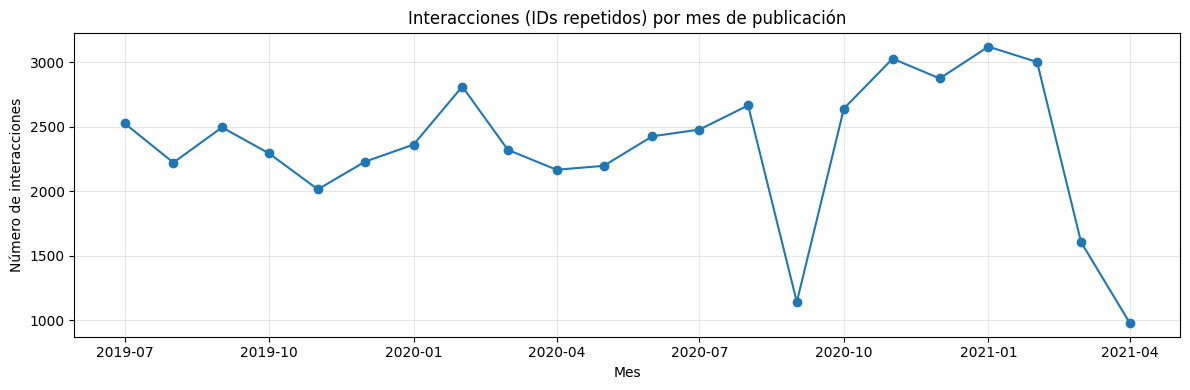

In [5]:
# Celda: Distribución mensual de interacciones (IDs no únicos)
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar filas válidas y detectar IDs repetidos
base = df.loc[:, ['id', 'publish_date']].dropna(subset=['id', 'publish_date'])
duplicados_mask = base.duplicated(subset='id', keep=False)  # True para todos los IDs no únicos
interacciones = base.loc[duplicados_mask].assign(
    publish_month=lambda x: pd.to_datetime(x['publish_date'], errors='coerce').dt.to_period('M')
).dropna(subset=['publish_month'])

# Agregar conteos por mes
interacciones_por_mes = (
    interacciones
    .groupby('publish_month')
    .size()
    .rename('interacciones')
    .sort_index()
)

display(interacciones_por_mes.head())

# Graficar
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(interacciones_por_mes.index.to_timestamp(), interacciones_por_mes.values, marker='o', linewidth=1.5)
ax.set_title('Interacciones (IDs repetidos) por mes de publicación')
ax.set_xlabel('Mes')
ax.set_ylabel('Número de interacciones')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [9]:
import pathlib, sys
import pandas as pd

project_root = pathlib.Path().resolve()
scripts_dir = project_root / "src" / "scripts"
if str(scripts_dir) not in sys.path:
    sys.path.append(str(scripts_dir))

from run_pcd_manual_end2end import run_end_to_end
from pcd.data_processing import normalizar_nombres_nodos_dispatch


In [10]:
cols = ["from_node_label", "to_node_label", "sentiment"]
df_filtered = df.dropna(subset=cols).copy()

norm_nodes = normalizar_nombres_nodos_dispatch(
    df_filtered[["from_node_label", "to_node_label"]]
      .rename(columns={"from_node_label": "FROM_NODE", "to_node_label": "TO_NODE"}),
    columnas_nodos=["FROM_NODE", "TO_NODE"],
)

df_filtered["FROM_NODE_NORM"] = norm_nodes["FROM_NODE"]
df_filtered["TO_NODE_NORM"] = norm_nodes["TO_NODE"]

pcd_input = df_filtered[["FROM_NODE_NORM", "TO_NODE_NORM", "sentiment"]].rename(
    columns={"FROM_NODE_NORM": "FROM_NODE", "TO_NODE_NORM": "TO_NODE", "sentiment": "SIGN"}
)


In [11]:
pcd_result = run_end_to_end(pcd_input)
nodes_df = pcd_result["nodes_df"].rename(columns={"node": "node_norm"})
nodes_df.head()


C:\Users\benja\OneDrive\Desktop\GitHub 2025\csc\src\scripts\run_pcd_manual_end2end.py:129: RuntimeWarning: invalid value encountered in divide
  S_eq = np.where(denom > 0, (d_S1 - d_S2) / denom, 0.0)
C:\Users\benja\OneDrive\Desktop\GitHub 2025\csc\src\scripts\run_pcd_manual_end2end.py:134: RuntimeWarning: invalid value encountered in divide
  P_anom = np.where(d_inter > 0, d_inter_pos / d_inter, 0.0)
C:\Users\benja\OneDrive\Desktop\GitHub 2025\csc\src\scripts\run_pcd_manual_end2end.py:143: RuntimeWarning: invalid value encountered in divide
  P_ext = np.where(d_total > 0, d_ext / d_total, 0.0)
C:\Users\benja\OneDrive\Desktop\GitHub 2025\csc\src\scripts\run_pcd_manual_end2end.py:426: RuntimeWarning: invalid value encountered in divide
  pi_opp = np.where((w_ext_pos + w_ext_neg) > 0, w_ext_neg / (w_ext_pos + w_ext_neg), 0.0)
C:\Users\benja\OneDrive\Desktop\GitHub 2025\csc\src\scripts\run_pcd_manual_end2end.py:297: RuntimeWarning: divide by zero encountered in divide
  inv_logdeg = np.whe

,node_norm,cluster,deg_total,S_eq,d_anom,P_anom,d_ext,P_ext,C_eig,Bext,...,U_intra,U,SIdeg_hat,SIesp_hat,U_hat,SH_star_deg,SH_star_esp,SH_star_deg_gamma,SH_star_esp_gamma,typology
0,31,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.644377,0.0,0.0,0.645865,0.0,0.0,0.0,0.0,sh-spanner
1,a'lelia bundles,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,sh-spanner
2,a.b. quintanilla,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.537879,0.0,0.0,0.539121,0.0,0.0,0.0,0.0,sh-spanner
3,aakriti gupta,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,sh-spanner
4,aaliyah,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,sh-spanner


In [12]:
from_metrics = nodes_df.rename(columns={"node_norm": "FROM_NODE_NORM"})
from_metrics = from_metrics.rename(columns={c: f"from_{c}" for c in from_metrics.columns if c != "FROM_NODE_NORM"})

to_metrics = nodes_df.rename(columns={"node_norm": "TO_NODE_NORM"})
to_metrics = to_metrics.rename(columns={c: f"to_{c}" for c in to_metrics.columns if c != "TO_NODE_NORM"})

df_enriched = (
    df_filtered
    .merge(from_metrics, on="FROM_NODE_NORM", how="left")
    .merge(to_metrics, on="TO_NODE_NORM", how="left")
)
df_enriched.head()


,from_node_id,from_node_label,from_node_summary,to_node_id,to_node_label,to_node_summary,relacion_especifica,categoria_semantica,sentiment,news_index,...,to_U_intra,to_U,to_SIdeg_hat,to_SIesp_hat,to_U_hat,to_SH_star_deg,to_SH_star_esp,to_SH_star_deg_gamma,to_SH_star_esp_gamma,to_typology
0,3,Guido Garay,Astrónomo que liderará jornada educativa en Ce...,4,Joaquín Lavín,Alcalde que asistirá a la jornada educativa en...,lidero_jornada_con,Interacción Protocolar,neutral,0,...,0.148769,0.124471,0.017785,0.400853,0.124758,0.047105,0.223629,0.047105,0.223629,sh-spanner
1,3,Guido Garay,Astrónomo que liderará jornada educativa en Ce...,5,Felipe Ward,Ministro que asistirá a la jornada educativa e...,lidero_jornada_con,Interacción Protocolar,neutral,0,...,0.025399,0.031022,0.003790,0.583880,0.031094,0.010856,0.134740,0.010856,0.134740,sh-spanner
2,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,8,Andrés Escala,Astrónomo miembro de la delegación de la Unive...,encabezo_delegacion_con,Coordinación Estratégica,neutral,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sh-spanner
3,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,9,Mónica Rubio,Astrónoma miembro de la delegación de la Unive...,encabezo_delegacion_con,Coordinación Estratégica,neutral,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sh-spanner
4,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,1,José Maza,Astrónomo y académico que busca récord Guinnes...,agradecio_compromiso_de,Apoyo Político,positive,0,...,0.000000,0.140792,0.000000,0.000000,0.141117,0.000000,0.000000,0.000000,0.000000,sh-spanner


In [14]:
df_enriched

,from_node_id,from_node_label,from_node_summary,to_node_id,to_node_label,to_node_summary,relacion_especifica,categoria_semantica,sentiment,news_index,...,to_U_intra,to_U,to_SIdeg_hat,to_SIesp_hat,to_U_hat,to_SH_star_deg,to_SH_star_esp,to_SH_star_deg_gamma,to_SH_star_esp_gamma,to_typology
0,3,Guido Garay,Astrónomo que liderará jornada educativa en Ce...,4,Joaquín Lavín,Alcalde que asistirá a la jornada educativa en...,lidero_jornada_con,Interacción Protocolar,neutral,0,...,0.148769,0.124471,0.017785,0.400853,0.124758,0.047105,0.223629,0.047105,0.223629,sh-spanner
1,3,Guido Garay,Astrónomo que liderará jornada educativa en Ce...,5,Felipe Ward,Ministro que asistirá a la jornada educativa e...,lidero_jornada_con,Interacción Protocolar,neutral,0,...,0.025399,0.031022,0.003790,0.583880,0.031094,0.010856,0.134740,0.010856,0.134740,sh-spanner
2,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,8,Andrés Escala,Astrónomo miembro de la delegación de la Unive...,encabezo_delegacion_con,Coordinación Estratégica,neutral,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sh-spanner
3,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,9,Mónica Rubio,Astrónoma miembro de la delegación de la Unive...,encabezo_delegacion_con,Coordinación Estratégica,neutral,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sh-spanner
4,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,1,José Maza,Astrónomo y académico que busca récord Guinnes...,agradecio_compromiso_de,Apoyo Político,positive,0,...,0.000000,0.140792,0.000000,0.000000,0.141117,0.000000,0.000000,0.000000,0.000000,sh-spanner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52209,5,Jorge Ortiz,Analista que comparó y valoró la experiencia d...,1,Guillermo Lasso,Candidato proclamado ganador; celebró ventaja ...,elogio_experiencia_y_trayectoria,Intercambio de Información,positive,9998,...,0.031693,0.024190,0.000000,0.080592,0.024246,0.000000,0.044204,0.000000,0.044204,sh-spanner
52210,5,Jorge Ortiz,Analista que comparó y valoró la experiencia d...,2,Andrés Arauz,Candidato; inicialmente reclamó victoria y lue...,critico_falta_de_meritos,Conflicto Discursivo,negative,9998,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sh-spanner
52211,6,Grace Jaramillo,Analista que instó al nuevo gobierno a despola...,1,Guillermo Lasso,Candidato proclamado ganador; celebró ventaja ...,insto_despolarizar_pais,Coordinación Estratégica,positive,9998,...,0.031693,0.024190,0.000000,0.080592,0.024246,0.000000,0.044204,0.000000,0.044204,sh-spanner
52212,7,Farith Simon,Profesor-analista que llamó a reconstruir prot...,1,Guillermo Lasso,Candidato proclamado ganador; celebró ventaja ...,insto_reconstruir_espiritu_democratico,Coordinación Estratégica,positive,9998,...,0.031693,0.024190,0.000000,0.080592,0.024246,0.000000,0.044204,0.000000,0.044204,sh-spanner


In [15]:
cluster_cols = ["from_cluster", "to_cluster"]
cluster_series = (
    df_enriched[cluster_cols]
    .melt(value_name="cluster", var_name="endpoint")
    .dropna(subset=["cluster"])
)

cluster_pct = (
    cluster_series["cluster"]
    .value_counts(normalize=True)
    .rename_axis("cluster")
    .mul(100)
    .reset_index(name="pct")
)

cluster_pct


,cluster,pct
0,0,53.106447
1,1,30.664190
2,-1,16.229364


In [17]:
cluster_cols = ["from_cluster", "to_cluster"]
cluster_series = (
    df_enriched[cluster_cols]
    .melt(value_name="cluster", var_name="endpoint")
    .dropna(subset=["cluster"])
)
cluster_series = cluster_series[cluster_series["cluster"].isin([-1, 1])]

cluster_pct = (
    cluster_series["cluster"]
    .value_counts(normalize=True)
    .reindex([-1, 1], fill_value=0)  # fuerza el orden -1, 1
    .mul(100)
    .reset_index(name="pct")
    .rename(columns={"index": "cluster"})
)
cluster_pct



,cluster,pct
0,-1,34.608944
1,1,65.391056


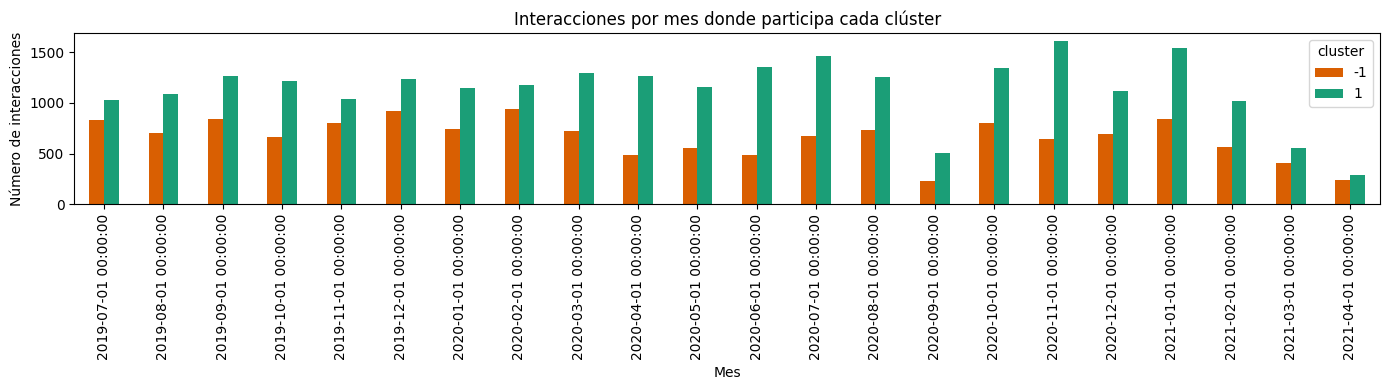

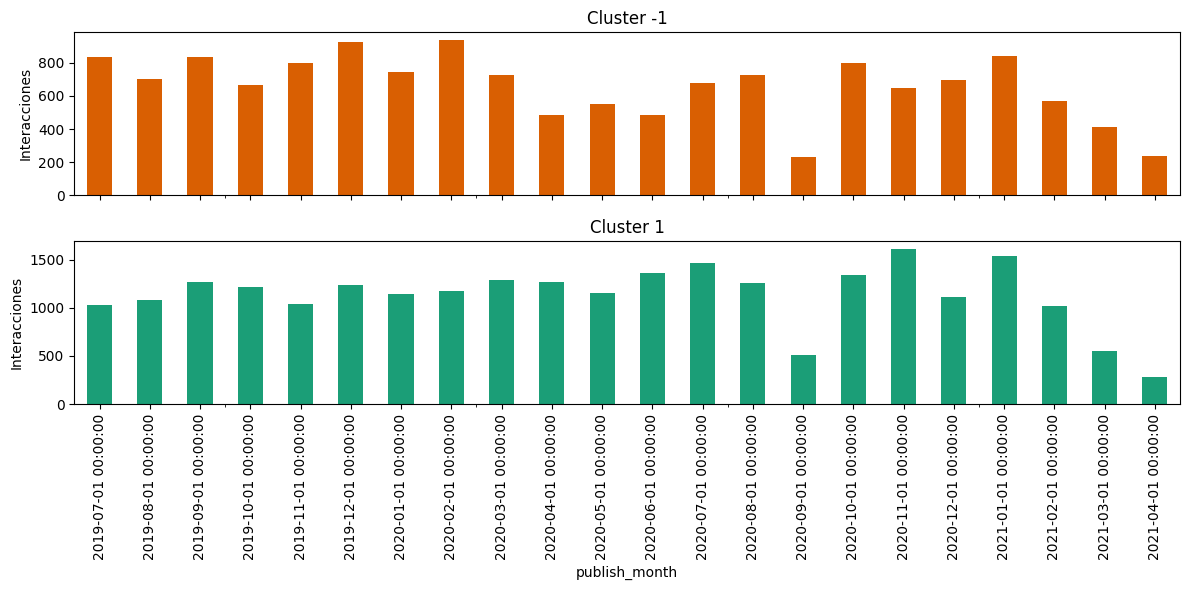

In [19]:
df_enriched = df_enriched.copy()
df_enriched["publish_date"] = pd.to_datetime(df_enriched["publish_date"], errors="coerce")
df_enriched["publish_month"] = df_enriched["publish_date"].dt.to_period("M")
df_enriched = df_enriched.reset_index().rename(columns={"index": "interaction_id"})


cluster_events = (
    df_enriched.melt(
        id_vars=["interaction_id", "publish_month"],
        value_vars=["from_cluster", "to_cluster"],
        value_name="cluster",
        var_name="endpoint"
    )
    .dropna(subset=["cluster"])
    .query("cluster in [-1, 1]")
    .drop_duplicates(subset=["interaction_id", "cluster", "publish_month"])
)


counts_by_month = (
    cluster_events
    .groupby(["publish_month", "cluster"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=[-1, 1], fill_value=0)
)
counts_by_month.index = counts_by_month.index.to_timestamp()

counts_by_month.head()



ax = counts_by_month.plot(kind="bar", figsize=(14, 4), color={-1: "#d95f02", 1: "#1b9e77"})
ax.set_title("Interacciones por mes donde participa cada clúster")
ax.set_xlabel("Mes")
ax.set_ylabel("Número de interacciones")
ax.legend(title="cluster")
plt.tight_layout()
plt.show()




fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
counts_by_month[-1].plot(kind="bar", ax=axes[0], color="#d95f02", title="Cluster -1")
counts_by_month[1].plot(kind="bar", ax=axes[1], color="#1b9e77", title="Cluster 1")
for ax in axes:
    ax.set_ylabel("Interacciones")
plt.tight_layout()
plt.show()






In [1]:
import pathlib, sys
import pandas as pd

project_root = pathlib.Path().resolve()
scripts_dir = project_root / "src" / "scripts"
if str(scripts_dir) not in sys.path:
    sys.path.append(str(scripts_dir))

from run_pcd_manual_end2end import run_end_to_end
from pcd.data_processing import normalizar_nombres_nodos_dispatch


In [4]:
cols = ["from_node_label", "to_node_label", "sentiment"]
df_filtered = df.dropna(subset=cols).copy()

norm_nodes = normalizar_nombres_nodos_dispatch(
    df_filtered[["from_node_label", "to_node_label"]]
      .rename(columns={"from_node_label": "FROM_NODE", "to_node_label": "TO_NODE"}),
    columnas_nodos=["FROM_NODE", "TO_NODE"],
)

df_filtered["FROM_NODE_NORM"] = norm_nodes["FROM_NODE"]
df_filtered["TO_NODE_NORM"] = norm_nodes["TO_NODE"]

pcd_input = df_filtered[["FROM_NODE_NORM", "TO_NODE_NORM", "sentiment"]].rename(
    columns={"FROM_NODE_NORM": "FROM_NODE", "TO_NODE_NORM": "TO_NODE", "sentiment": "SIGN"}
)


In [59]:
mapping = {
    "Conflicto Discursivo": "negative",
    "Coordinación Estratégica": "positive",
    "Apoyo Político": "positive",
}

df_mapped = df.copy()
df_mapped["SIGN"] = (
    df_mapped["categoria_semantica"].map(mapping)
    .fillna(df_mapped["sentiment"])
    .str.lower()
)

# Si necesitas la columna sentiment con esos nuevos valores:
df_mapped["sentiment"] = df_mapped["SIGN"]

# Normaliza nodos como antes
norm_nodes = normalizar_nombres_nodos_dispatch(
    df_mapped[["from_node_label", "to_node_label"]]
      .rename(columns={"from_node_label": "FROM_NODE", "to_node_label": "TO_NODE"}),
    columnas_nodos=["FROM_NODE", "TO_NODE"],
)
df_mapped["FROM_NODE_NORM"] = norm_nodes["FROM_NODE"]
df_mapped["TO_NODE_NORM"] = norm_nodes["TO_NODE"]

df_filtered = df_mapped.dropna(subset=["FROM_NODE_NORM", "TO_NODE_NORM", "SIGN"]).copy()

pcd_input = df_filtered[["FROM_NODE_NORM", "TO_NODE_NORM", "SIGN"]].rename(
    columns={"FROM_NODE_NORM": "FROM_NODE", "TO_NODE_NORM": "TO_NODE"}
)

pcd_result = run_end_to_end(pcd_input, minimal=True)
nodes_df = pcd_result["nodes_df"].rename(columns={"node": "node_norm"})

from_metrics = nodes_df.rename(columns={"node_norm": "FROM_NODE_NORM"}).rename(
    columns=lambda c: f"from_{c}" if c != "FROM_NODE_NORM" else c
)
to_metrics = nodes_df.rename(columns={"node_norm": "TO_NODE_NORM"}).rename(
    columns=lambda c: f"to_{c}" if c != "TO_NODE_NORM" else c
)

df_enriched = (
    df_filtered
    .merge(from_metrics, on="FROM_NODE_NORM", how="left")
    .merge(to_metrics, on="TO_NODE_NORM", how="left")
)


In [52]:
sentiment_by_cat = (
    df_enriched[["categoria_semantica", "SIGN"]]
    .dropna()
    .pipe(lambda d: pd.crosstab(d["categoria_semantica"], d["SIGN"]))
)


In [53]:
from_metrics = nodes_df.rename(columns={"node_norm": "FROM_NODE_NORM"})
from_metrics = from_metrics.rename(columns={c: f"from_{c}" for c in from_metrics.columns if c != "FROM_NODE_NORM"})

to_metrics = nodes_df.rename(columns={"node_norm": "TO_NODE_NORM"})
to_metrics = to_metrics.rename(columns={c: f"to_{c}" for c in to_metrics.columns if c != "TO_NODE_NORM"})

df_enriched = (
    df_filtered
    .merge(from_metrics, on="FROM_NODE_NORM", how="left")
    .merge(to_metrics, on="TO_NODE_NORM", how="left")
)
df_enriched.head()


,from_node_id,from_node_label,from_node_summary,to_node_id,to_node_label,to_node_summary,relacion_especifica,categoria_semantica,sentiment,news_index,id,publish_date,title,body,SIGN,FROM_NODE_NORM,TO_NODE_NORM,from_cluster,to_cluster
0,3,Guido Garay,Astrónomo que liderará jornada educativa en Ce...,4,Joaquín Lavín,Alcalde que asistirá a la jornada educativa en...,lidero_jornada_con,Interacción Protocolar,neutral,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid...",neutral,guido garay,joaquin lavin,0,1
1,3,Guido Garay,Astrónomo que liderará jornada educativa en Ce...,5,Felipe Ward,Ministro que asistirá a la jornada educativa e...,lidero_jornada_con,Interacción Protocolar,neutral,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid...",neutral,guido garay,felipe ward,0,1
2,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,8,Andrés Escala,Astrónomo miembro de la delegación de la Unive...,encabezo_delegacion_con,Coordinación Estratégica,positive,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid...",positive,ennio vivaldi,andres escala,-1,0
3,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,9,Mónica Rubio,Astrónoma miembro de la delegación de la Unive...,encabezo_delegacion_con,Coordinación Estratégica,positive,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid...",positive,ennio vivaldi,monica rubio,-1,0
4,7,Ennio Vivaldi,Rector que encabezó delegación y elogió el com...,1,José Maza,Astrónomo y académico que busca récord Guinnes...,agradecio_compromiso_de,Apoyo Político,positive,0,1073f805cdc17e54d7ff9de18301a2dee8afa5fb32930f...,2019-07-01,José Maza intentará batir un récord Guinness c...,"Se estableció en 2018 en Vermont, Estados Unid...",positive,ennio vivaldi,jose maza,-1,0


In [45]:
df_enriched = df_enriched.copy()

if "publish_date" not in df_enriched.columns:
    raise ValueError("df_enriched no trae publish_date; revisa tus merges previos.")

df_enriched["publish_date"] = pd.to_datetime(
    df_enriched["publish_date"],
    errors="coerce"
)
df_enriched["publish_month"] = df_enriched["publish_date"].dt.to_period("M")


In [54]:
import pandas as pd

sentiment_by_cat = (
    df_enriched[["categoria_semantica", "sentiment"]]
    .dropna(subset=["categoria_semantica", "sentiment"])
    .assign(sentiment=lambda d: d["sentiment"].str.lower())
    .pipe(lambda d: pd.crosstab(d["categoria_semantica"], d["sentiment"]))
)

# Ordena por el total de registros por categoría
sentiment_by_cat["total"] = sentiment_by_cat.sum(axis=1)
sentiment_by_cat = sentiment_by_cat.sort_values("total", ascending=False)

sentiment_by_cat

sentiment,negative,neutral,positive,total
categoria_semantica,,,,
Conflicto Discursivo,12686,0,0,12686
Coordinación Estratégica,0,0,9197,9197
Apoyo Político,0,0,7135,7135
Other,1987,2812,1709,6508
Intercambio de Información,482,3726,1004,5212
Acción de Fiscalización,2870,1132,231,4233
Interacción Protocolar,160,2125,1153,3438
Negociación / Diálogo,539,1410,555,2504
Acuerdo Formal,38,513,387,938


In [15]:
import numpy as np
import pandas as pd
from pcd.data_processing import preprocess_and_create_signed_adjacency_matrix
from pcd.analysis import calcular_metricas_paper

# Clúster por nodo (combina extremos; revisa si algún nodo tiene etiquetas contradictorias)
cluster_lookup = (
    pd.concat([
        df_enriched[['FROM_NODE_NORM', 'from_cluster']].rename(columns={'FROM_NODE_NORM': 'node_norm', 'from_cluster': 'cluster'}),
        df_enriched[['TO_NODE_NORM', 'to_cluster']].rename(columns={'TO_NODE_NORM': 'node_norm', 'to_cluster': 'cluster'})
    ], ignore_index=True)
    .dropna(subset=['node_norm', 'cluster'])
    .drop_duplicates(subset=['node_norm'])
    .assign(cluster=lambda d: d['cluster'].astype(int))
    .set_index('node_norm')['cluster']
    .to_dict()
)

sign_map = {'positive': 1, 'positivo': 1,
            'negative': -1, 'negativo': -1,
            'neutral': 0, 'neutro': 0}

metrics_by_month = []
for month, df_month in df_enriched.dropna(subset=['publish_month']).groupby('publish_month'):
    edges = (
        df_month[['FROM_NODE_NORM', 'TO_NODE_NORM', 'sentiment']]
        .rename(columns={'FROM_NODE_NORM': 'FROM_NODE', 'TO_NODE_NORM': 'TO_NODE', 'sentiment': 'SIGN'})
        .dropna(subset=['FROM_NODE', 'TO_NODE'])
        .copy()
    )
    if edges.empty:
        continue

    edges['SIGN'] = edges['SIGN'].map(sign_map).fillna(edges['SIGN']).astype(object)

    A_s, node_to_idx, idx_to_node, n_nodes, _ = preprocess_and_create_signed_adjacency_matrix(
        df_input=edges,
        from_node_col='FROM_NODE',
        to_node_col='TO_NODE',
        sign_col='SIGN',
        node_norm_strategy='raw',
        weighting_strategy='binary_sum_signs_actual',
    )
    if n_nodes <= 1 or A_s.nnz == 0:
        continue

    labels = np.zeros(n_nodes, dtype=int)
    for idx, node in idx_to_node.items():
        labels[idx] = int(cluster_lookup.get(node, 0))

    metrics = calcular_metricas_paper(
        nombre_algoritmo='PCD_global',
        x_result=labels,
        A_s=A_s,
        k=2,
        alpha=1.0,
        calculate_intra_cluster_cc=True,
    )
    metrics['publish_month'] = month.to_timestamp()
    metrics_by_month.append(metrics)

metrics_df = pd.DataFrame(metrics_by_month).set_index('publish_month')
metrics_df.head()


,Algoritmo,POL,BA-POL,SIZE,BAL,K,MAC,MAO,CC+,CC-,DENS,ISO,CC_intra_S1,CC_intra_S2
publish_month,,,,,,,,,,,,,,
2019-07-01,PCD_global,0.618321,0.599725,262,0.969925,2,0.002799,0.007810,0.386861,0.685535,0.004329,0.422254,0.057298,0.052896
2019-08-01,PCD_global,0.837607,0.768951,234,0.918033,2,0.004088,0.010319,0.605839,0.668639,0.005612,0.535902,0.061866,0.060448
2019-09-01,PCD_global,0.808118,0.802176,271,0.992647,2,0.003509,0.009041,0.414365,0.765957,0.005043,0.474293,0.117481,0.088112
2019-10-01,PCD_global,0.599206,0.580481,252,0.968750,2,0.002830,0.007497,0.353846,0.789474,0.004158,0.417460,0.016667,0.082457
2019-11-01,PCD_global,0.913725,0.838154,255,0.917293,2,0.002904,0.011956,0.491803,0.804651,0.005203,0.482808,0.016541,0.087219


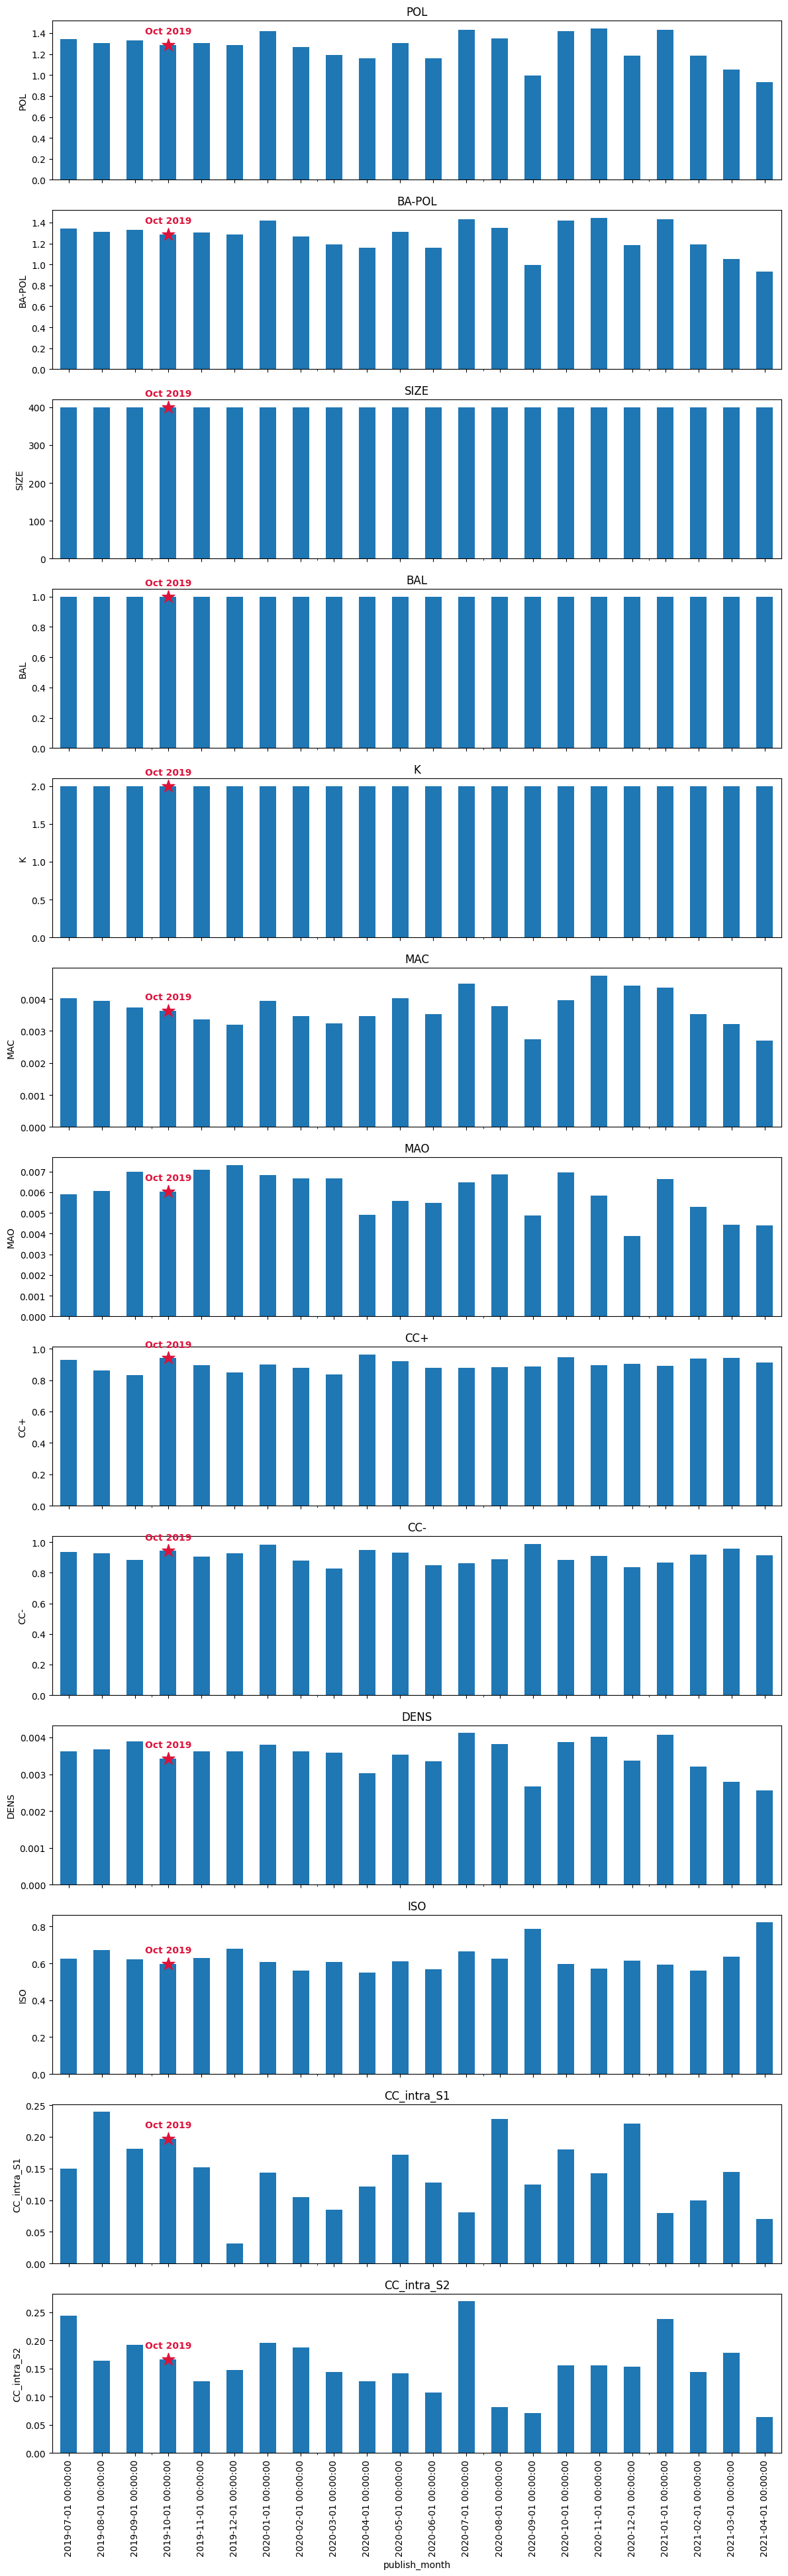

In [60]:
import matplotlib.pyplot as plt

numeric_cols = [c for c in metrics_df.columns if c not in {'Algoritmo'}]


oct_2019 = pd.Timestamp('2019-10-01')

fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 3 * len(numeric_cols)), sharex=True)
if len(numeric_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, numeric_cols):
    metrics_df[col].plot(kind='bar', ax=ax, color='#1f77b4')
    ax.set_title(col)
    ax.set_ylabel(col)

    if oct_2019 in metrics_df.index:
        idx = metrics_df.index.get_loc(oct_2019)
        # Coordenada x prevista para la barra correspondiente
        x_star = ax.patches[idx].get_x() + ax.patches[idx].get_width() / 2
        y_star = metrics_df.loc[oct_2019, col]

        ax.scatter(x_star, y_star, marker='*', s=200, color='crimson', zorder=5)
        ax.annotate('Oct 2019', xy=(x_star, y_star), xytext=(0, 12),
                    textcoords='offset points', ha='center', color='crimson',
                    fontweight='bold')

plt.tight_layout()
plt.show()


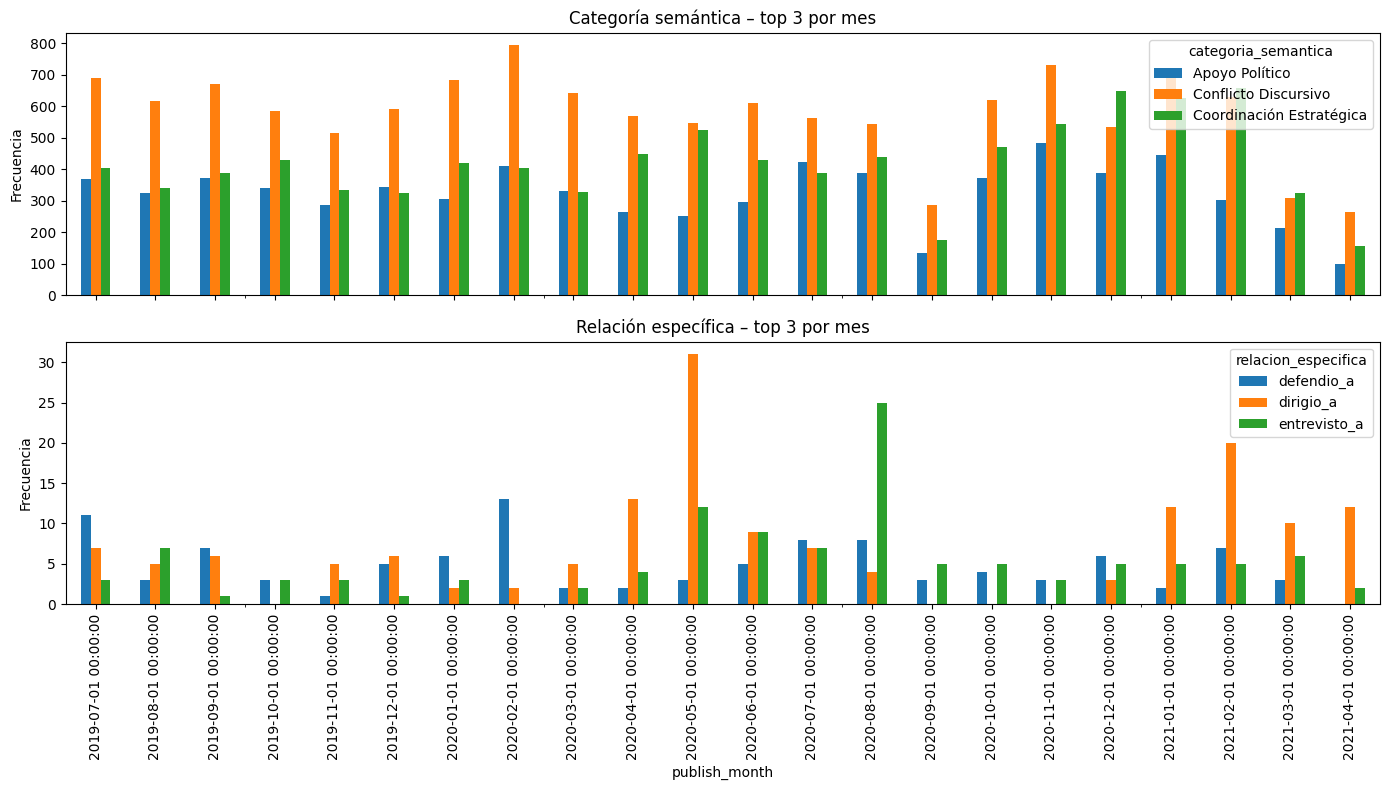

In [61]:
top_cats = (
    df_enriched["categoria_semantica"]
    .dropna()
    .value_counts()
    .head(3)
    .index.tolist()
)

top_rels = (
    df_enriched["relacion_especifica"]
    .dropna()
    .value_counts()
    .head(3)
    .index.tolist()
)
df_enriched["publish_date"] = pd.to_datetime(df_enriched["publish_date"], errors="coerce")
df_enriched["publish_month"] = df_enriched["publish_date"].dt.to_period("M")
# Categoría semántica
cats_month = (
    df_enriched[df_enriched["categoria_semantica"].isin(top_cats)]
    .groupby(["publish_month", "categoria_semantica"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)
cats_month.index = cats_month.index.to_timestamp()

# Relación específica
rels_month = (
    df_enriched[df_enriched["relacion_especifica"].isin(top_rels)]
    .groupby(["publish_month", "relacion_especifica"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)
rels_month.index = rels_month.index.to_timestamp()
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

cats_month.plot(kind="bar", ax=axes[0])
axes[0].set_title("Categoría semántica – top 3 por mes")
axes[0].set_ylabel("Frecuencia")

rels_month.plot(kind="bar", ax=axes[1])
axes[1].set_title("Relación específica – top 3 por mes")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

